IMPORTS

In [79]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from datetime import datetime as dt

LOAD DATA

In [80]:
# uploading day data
bike_data = pd.read_csv('/Users/esrasaydam/Documents/Springboard/GitHub/Capstone Project #2/Bike_data1.csv')

In [81]:
bike_data.info


<bound method DataFrame.info of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      727  2012-12-27       1   1    12        0        4           1   
726      728  2012-12-28       1   1    12        0        5           1   
727      729  2012-12-29       1   1    12        0        6           0   
728      730  2012-12-30       1   1    12        0        0           0   
729      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspee

In [82]:
bike_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [83]:
bike_data['dteday'] = pd.to_datetime(bike_data['dteday'])
bike_data.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [84]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [85]:
# Distribution of counts (average) per season and weathersit...
# let's look at the count summary per each season of 2 years...

season_data = bike_data[['season', 'cnt']]
season_data.head()


,season,cnt
0,1,985
1,1,801
2,1,1349
3,1,1562
4,1,1600


In [86]:
season_data.groupby(by = 'season').cnt.sum()

season
1     471348
2     918589
3    1061129
4     841591
Name: cnt, dtype: int64

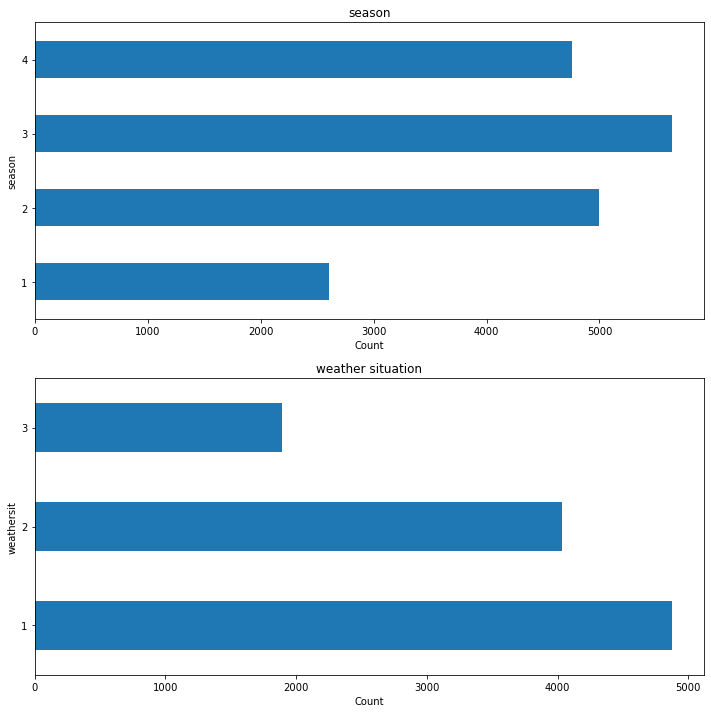

In [87]:
#distribution of average bike rental counts per season and weather situation
season_avg_count = bike_data.groupby(by = 'season').cnt.mean()
weathersit_avg_count = bike_data.groupby(by = 'weathersit').cnt.mean()
#Create two subplots on 2 rows and 1 column with a figsize of (12, 12)

fig, ax = plt.subplots(2, 1, figsize=(12, 12))
season_avg_count.plot(kind= 'barh', ax=ax[0])
ax[0].set_title('season')
ax[0].set_xlabel('Count')
weathersit_avg_count.plot(kind='barh', ax=ax[1])
ax[1].set_title('weather situation')
ax[1].set_xlabel('Count')

plt.subplots_adjust(wspace= 0.5);


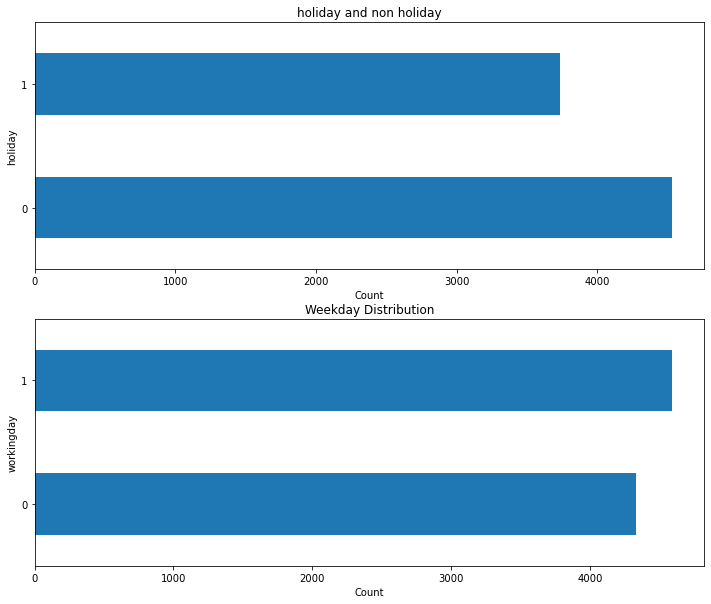

In [88]:
#distribution of bike rental counts by holidays

holiday_avg_count = bike_data.groupby('holiday').cnt.mean()
workday_avg_count = bike_data.groupby('workingday').cnt.mean()

fig, ax = plt.subplots(2, 1, figsize=(12, 10))
holiday_avg_count.plot(kind= 'barh', ax=ax[0])
ax[0].set_title('holiday and non holiday')
ax[0].set_xlabel('Count')

workday_avg_count.plot(kind='barh', ax=ax[1])
ax[1].set_title('Weekday Distribution')
ax[1].set_xlabel('Count')

plt.subplots_adjust(wspace= 0.5);

In [89]:
#people use bikes less when it's not a workday.  But the difference seems small especially between weekend and weekdays.

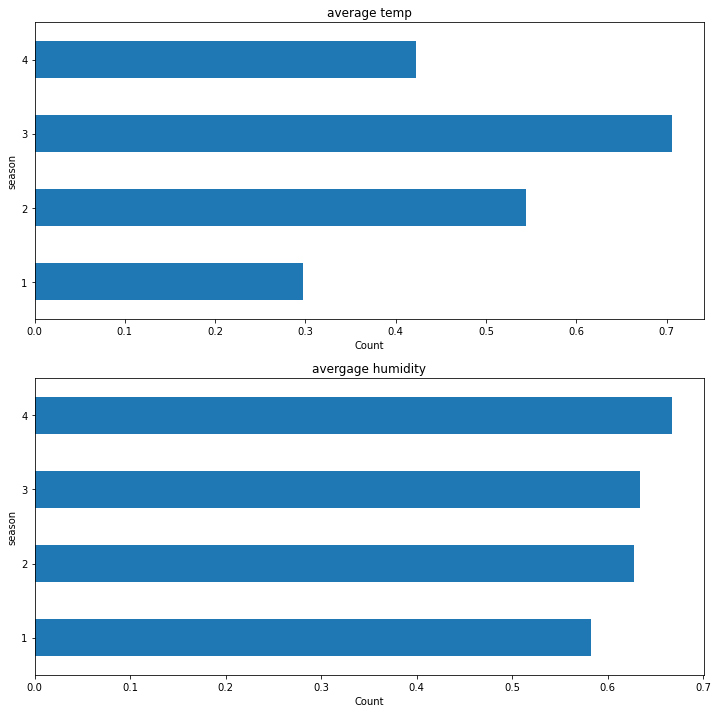

In [90]:
#now let's focus on distribution of average temperature and humidity per seasons
season_avg_temp = bike_data.groupby(by = 'season').temp.mean()
season_avg_hum = bike_data.groupby(by = 'season').hum.mean()
#Create two subplots on 2 rows and 1 column with a figsize of (12, 12)
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
season_avg_temp .plot(kind= 'barh', ax=ax[0])
ax[0].set_title('average temp')
ax[0].set_xlabel('Count')
season_avg_hum .plot(kind='barh', ax=ax[1])
ax[1].set_title('avergage humidity')
ax[1].set_xlabel('Count')

plt.subplots_adjust(wspace= 0.5);

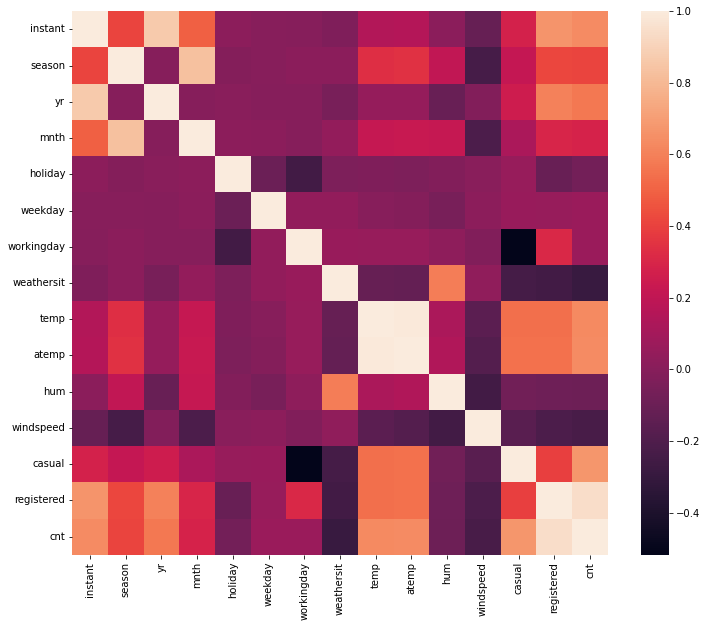

In [91]:
#let's do a heatmap to see the correlations of the values

plt.subplots(figsize=(12,10))
sns.heatmap(bike_data.corr());

Windspeed together weather situation seem to be highly correlated to count of bike rentals

In [92]:

bike_2011 = bike_data[bike_data['yr'] == 0]

bike_2012 = bike_data[bike_data['yr'] == 1]
bike_2011.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [93]:
bike_2012.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
365,366,2012-01-01,1,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167,686,1608,2294
366,367,2012-01-02,1,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,244,1707,1951
367,368,2012-01-03,1,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,89,2147,2236
368,369,2012-01-04,1,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,95,2273,2368
369,370,2012-01-05,1,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,140,3132,3272


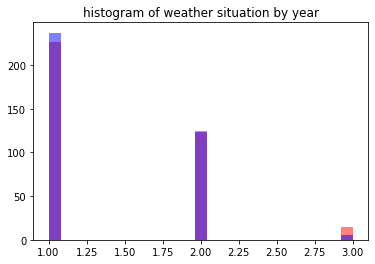

In [94]:

plt.hist(bike_data[bike_data['yr'] == 0].weathersit ,bins = 25, alpha = 0.5, 
         color = 'red')
plt.hist(bike_data[bike_data['yr'] == 1].weathersit ,bins = 25, alpha = 0.5,
         color = 'blue')
  
plt.title("histogram of weather situation by year")
  
plt.show()

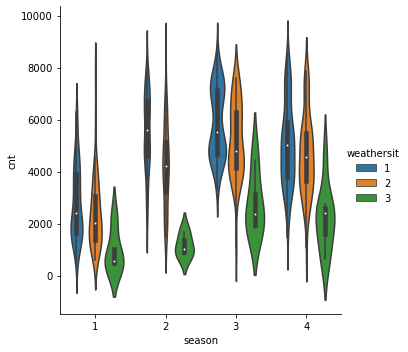

In [95]:
sns.catplot(
    data=bike_data, x="season", y="cnt", hue="weathersit", kind="violin",
)

People tend to bike less when there is precipitation. They don't mind it that much when it's summer or fall but in winter and spring it really affects the users.

In [96]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

<AxesSubplot:xlabel='windspeed', ylabel='cnt'>

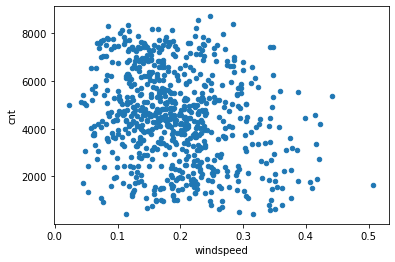

In [97]:
# checking windspeed

bike_data.plot.scatter (x= 'windspeed', y='cnt')

When there is slight wind, people rent it more. Checking if windspeed correlated to season

<AxesSubplot:xlabel='temp', ylabel='cnt'>

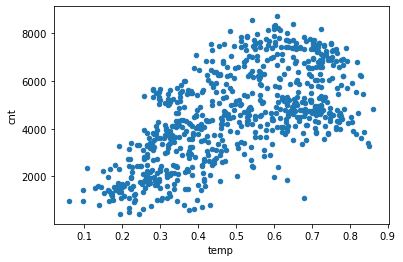

In [98]:
#checking temp
bike_data.plot.scatter (x= 'temp', y='cnt')

2012 has 25 percent more rentals than 2011. We can compare weather situation and temp to investigate if 
it's weather related or marketing.

Between temp 0.6 and 0.8 the bike rentals seem to be more common. Also if the windspeed is 0.4 or more the rentals are rare. Interesstingly when the windspeed is below 0.1 the rentals are also rare.

In [99]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'cnt', data=bike_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Bike Rental Count')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [100]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [101]:
features = [f for f in bike_data.columns if f not in ['instant', 'cnt']]

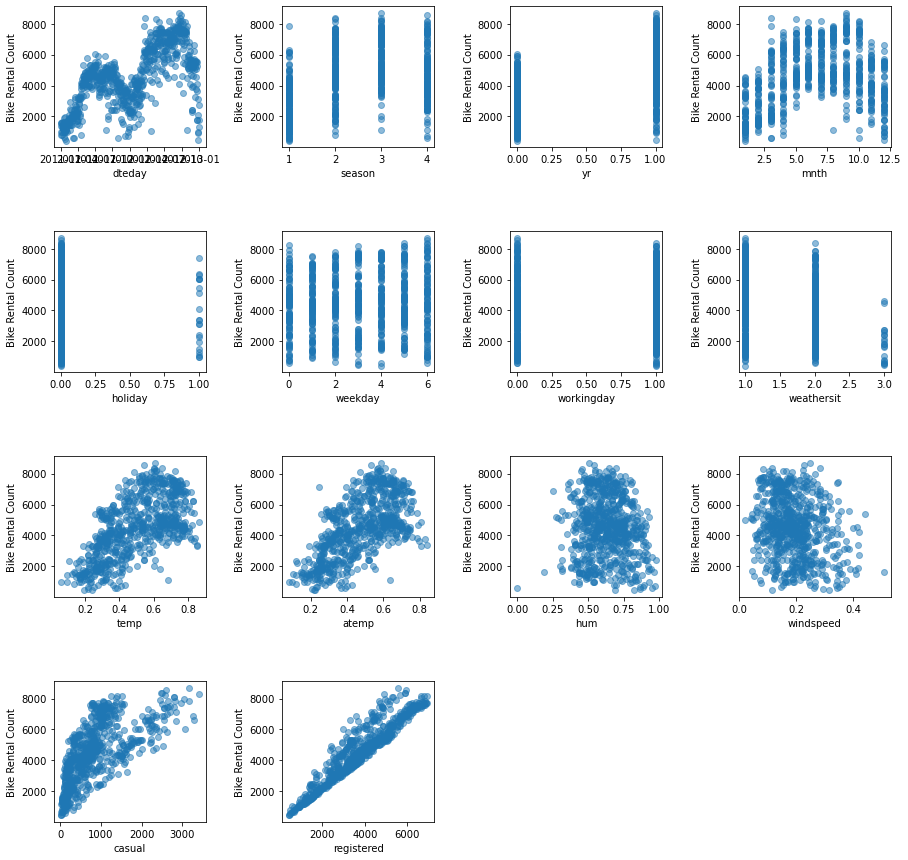

In [102]:
scatterplots(features, ncol=4, figsize=(15, 15))

In [103]:
Overalll temperature, humidity, windspeed, holidays, seasons (and months) seem to be quite affective. 

SyntaxError: invalid syntax (1597825665.py, line 1)

In [ ]:
#investigating why low windspeed and humidity decrease the bike rental counts.
bike_data.plot.scatter(
    x='dteday',
    y='windspeed',
    c = 'y'
)
bike_data.plot.scatter(
    x='dteday',
    y='temp',
    marker="d",
)
plt.show()

Lowest windspeeds seem to happen when the temperature is really low so this explains why the counts are low in both cases.

In [ ]:
bike_data.plot.scatter(
    x='dteday',
    y='hum',
    c = 'y'
)
bike_data.plot.scatter(
    x='dteday',
    y='temp',
    marker="d",
)
plt.show()

Once again lowest humidity happens when the temperature is quite low.

In [ ]:
#2011 was colder both in winter and summer but it generally looks smilar temperature wise.


plt.plot( 'dteday', 'cnt', data = bike_2011, label = '2011') 
plt.plot( 'dteday', 'cnt', data = bike_2012, label = '2012') 
plt.legend()

plt.show()

2011 had much less bike rentals and it seems like this was not motivated by weather but by 'newness' of the company
#which should apply also to Philadelphia branch since it will be their first operational year. We should continue with 2011. Taking into account windspeed, temp, season and weather situation... It would be also a good idea to come up with the mean of two years but then it would be a problem for weekends and holidays not having the same dates. So I'll stick with 2011 data. I also must say, in holidays the bike rental goes really low as well. Something to remember!

In [104]:
bike_2011.to_csv('/Users/esrasaydam/Documents/Springboard/GitHub/Capstone Project #2/Bike_2011.csv', index=False)
